# The Battle of Neighborhoods: Boston, Massachusetts

## Part 3: Exploration and Analysis of the Data about Boston Neighborhoods

### 1. Getting the Necessary Data 

Let's first import the libraries and packages we need.

In [1]:
import numpy as np 
import pandas as pd
import json
from geopy.geocoders import Nominatim
import geocoder
import requests
from bs4 import BeautifulSoup
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium

print('Everything works fine!')

Everything works fine!


Next, we need to scrape the data with the names of the official Boston neighborhoods. 

In [2]:
res = requests.get(
    'https://www.boston.gov/neighborhoods')

soup = BeautifulSoup(res.text, 'html.parser')

boston_neighborhoods = []

for row in soup.find_all('div', class_='g p-b500')[0].find_all('h3'):
    boston_neighborhoods.append(row.text)
print(boston_neighborhoods)


['Allston', 'Back Bay', 'Bay Village', 'Beacon Hill', 'Brighton', 'Charlestown', 'Chinatown-Leather District', 'Dorchester', 'Downtown', 'East Boston', 'Fenway-Kenmore', 'Hyde Park', 'Jamaica Plain', 'Mattapan', 'Mid-Dorchester', 'Mission Hill', 'North End', 'Roslindale', 'Roxbury', 'South Boston', 'South End', 'West End', 'West Roxbury']


Great. Let's not turn this list into a pandas dataframe.

In [3]:
df = pd.DataFrame({'Boston Neighborhoods': boston_neighborhoods})
df

,Boston Neighborhoods
0,Allston
1,Back Bay
2,Bay Village
3,Beacon Hill
4,Brighton
5,Charlestown
6,Chinatown-Leather District
7,Dorchester
8,Downtown
9,East Boston


In [4]:
df.shape[0]

23

23 official neighborhoods in the city of Boston: confirmed.

Next we are going to need the coordinates of the neighborhoods, so let's use *geocoder* to get them.

In [5]:
def find_latlng(neighborhood):
    lat_lng_coords = None
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Boston, Massachusetts'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [6]:
lat_long = [find_latlng(neighborhood) for neighborhood in df['Boston Neighborhoods']]

Let's check part of the list.

In [7]:
lat_long[:10]

[[42.35046649714098, -71.11100415506229],
 [42.34999000000005, -71.08764999999994],
 [42.348168000000015, -71.06847074999999],
 [42.35842000000008, -71.06859999999995],
 [42.35213123053123, -71.12492353661709],
 [42.36776992509806, -71.05901694825978],
 [42.35251000000005, -71.06089999999995],
 [42.35134867454975, -71.05285041243937],
 [42.35829000000007, -71.05662999999998],
 [42.35141360528571, -71.05671282961363]]

Good. We are going to create a new dataframe with the coordinates from this list and then we'll combine that dataframe with the first one we created. 

In [8]:
df_coordinates = pd.DataFrame(lat_long, columns=('Latitude', 'Longitude'))
df_coordinates

,Latitude,Longitude
0,42.350466,-71.111004
1,42.349990,-71.087650
2,42.348168,-71.068471
3,42.358420,-71.068600
4,42.352131,-71.124924
5,42.367770,-71.059017
6,42.352510,-71.060900
7,42.351349,-71.052850
8,42.358290,-71.056630
9,42.351414,-71.056713


In [9]:
df = df.assign(Latitude=df_coordinates.Latitude.values, Longitude=df_coordinates.Longitude.values)
df

,Boston Neighborhoods,Latitude,Longitude
0,Allston,42.350466,-71.111004
1,Back Bay,42.349990,-71.087650
2,Bay Village,42.348168,-71.068471
3,Beacon Hill,42.358420,-71.068600
4,Brighton,42.352131,-71.124924
5,Charlestown,42.367770,-71.059017
6,Chinatown-Leather District,42.352510,-71.060900
7,Dorchester,42.351349,-71.052850
8,Downtown,42.358290,-71.056630
9,East Boston,42.351414,-71.056713


Excellent. Now let's add the zip codes we found on the official website of the city of Boston. 

In [10]:
df['Zip Code'] = ['02134', '02116', '02116', '02108', '02135', '02129', '02111', '02121', '02201', '02128', '[02115, 02215]', '02136', '02130', '02126', '[02121, 02122, 02124, 02125]', '[02120, 02115]', '02113', '02131', '02119', '02127', '02118', '02114', '02132']

In [11]:
df['Zip Code']
df

,Boston Neighborhoods,Latitude,Longitude,Zip Code
0,Allston,42.350466,-71.111004,02134
1,Back Bay,42.349990,-71.087650,02116
2,Bay Village,42.348168,-71.068471,02116
3,Beacon Hill,42.358420,-71.068600,02108
4,Brighton,42.352131,-71.124924,02135
5,Charlestown,42.367770,-71.059017,02129
6,Chinatown-Leather District,42.352510,-71.060900,02111
7,Dorchester,42.351349,-71.052850,02121
8,Downtown,42.358290,-71.056630,02201
9,East Boston,42.351414,-71.056713,02128


It looks like we have some extra brackets here, so let's get rid of them.

In [12]:
df['Zip Code'] = df['Zip Code'].str.strip('[]')
df

,Boston Neighborhoods,Latitude,Longitude,Zip Code
0,Allston,42.350466,-71.111004,02134
1,Back Bay,42.349990,-71.087650,02116
2,Bay Village,42.348168,-71.068471,02116
3,Beacon Hill,42.358420,-71.068600,02108
4,Brighton,42.352131,-71.124924,02135
5,Charlestown,42.367770,-71.059017,02129
6,Chinatown-Leather District,42.352510,-71.060900,02111
7,Dorchester,42.351349,-71.052850,02121
8,Downtown,42.358290,-71.056630,02201
9,East Boston,42.351414,-71.056713,02128


Great. The next step is adding the BPD districts, found on the official website of the *Boston Police Department*.

In [13]:
df['BPD Districts'] = ['D-14', 'D-4', 'A-1', 'A-1', 'D-14', 'A-15', 'A-1', 'C-11', 'A-1', 'A-7', 'D-4', 'E-18', 'E-13', 'B-3', 'C-11', 'B-2', 'A-1', 'E-5', 'B-2', 'C-6', 'D-4', 'A-1', 'E-5']

In [14]:
df

,Boston Neighborhoods,Latitude,Longitude,Zip Code,BPD Districts
0,Allston,42.350466,-71.111004,02134,D-14
1,Back Bay,42.349990,-71.087650,02116,D-4
2,Bay Village,42.348168,-71.068471,02116,A-1
3,Beacon Hill,42.358420,-71.068600,02108,A-1
4,Brighton,42.352131,-71.124924,02135,D-14
5,Charlestown,42.367770,-71.059017,02129,A-15
6,Chinatown-Leather District,42.352510,-71.060900,02111,A-1
7,Dorchester,42.351349,-71.052850,02121,C-11
8,Downtown,42.358290,-71.056630,02201,A-1
9,East Boston,42.351414,-71.056713,02128,A-7


Great. Everything looks fine. We now have a dataframe with all the necessary info on the 23 neighborhoods.

Let's get started with the exploration.  

### 2. Exploration and Analysis

Before we start doing anything else, let's look at a map of the city of Boston with its neighborhoods. 

In [15]:
address = 'Boston, Massachusetts'

geolocator = Nominatim(user_agent="boston_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geograpical coordinates of '+ address + ' are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Boston, Massachusetts are 42.3602534, -71.0582912.


In [16]:
map_boston = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Boston Neighborhoods']):
    label = '{}'.format(neighborhood)
    folium.Marker([lat, lng], popup=label).add_to(map_boston) 
    
map_boston

We can click on the markers to see where are the neighborhoods located and where are their centers. 

OK, now let's dive into data exploration. 

#### a) Crime rate in Boston neighborhoods

The first thing we are going to explore, as the subtitle says, is the crime rate in the 23 neighborhoods from 2015 to date. It's necessary because crime rate, i.e. safety can be one of the crucial factors that affect business and livability. So, let's use the dataset we found on the official website of the city of Boston.

In [17]:
df_crime = pd.read_csv('tmpyeh05bxn.csv')
df_crime.head(11)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
1,I92102201,3301,NaN,VERBAL DISPUTE,E13,583,0,2019-12-20 03:08:00,2019,12,Friday,3,NaN,DAY ST,42.325122,-71.107779,"(42.32512200, -71.10777900)"
2,I92097173,3115,NaN,INVESTIGATE PERSON,C11,355,0,2019-10-23 00:00:00,2019,10,Wednesday,0,NaN,GIBSON ST,42.297555,-71.059709,"(42.29755500, -71.05970900)"
3,I92094519,3126,NaN,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,765,0,2019-11-22 07:50:00,2019,11,Friday,7,NaN,BROOKS ST,42.355120,-71.162678,"(42.35512000, -71.16267800)"
4,I92089785,3005,NaN,SICK ASSIST,E13,574,0,2019-11-05 18:00:00,2019,11,Tuesday,18,NaN,WASHINGTON ST,42.309718,-71.104294,"(42.30971800, -71.10429400)"
5,I90583827,1402,NaN,VANDALISM,E18,498,0,2019-11-02 05:09:00,2019,11,Saturday,5,NaN,BRADLEE ST,42.271616,-71.118074,"(42.27161600, -71.11807400)"
6,I20215549,3114,NaN,INVESTIGATE PROPERTY,A15,,0,2020-01-30 19:00:00,2020,1,Thursday,19,NaN,ARMORY ST,42.381400,-71.070263,"(42.38140000, -71.07026300)"
7,I20210846,3201,NaN,PROPERTY - LOST/ MISSING,C6,206,0,2020-02-09 00:30:00,2020,2,Sunday,0,NaN,SEAPORT BLVD,42.352756,-71.047481,"(42.35275600, -71.04748100)"
8,I20204246,1402,NaN,VANDALISM,E13,646,0,2020-01-16 16:30:00,2020,1,Thursday,16,NaN,SOUTH ST,42.309764,-71.115412,"(42.30976400, -71.11541200)"
9,I20201723,2907,NaN,VAL - OPERATING AFTER REV/SUSP.,E5,711,0,2020-03-03 10:33:00,2020,3,Tuesday,10,NaN,WASHINGTON ST,42.265925,-71.152127,"(42.26592500, -71.15212700)"


It's a pretty big dataset, but here we will focus only on several columns. We'll keep the columns that we need now and some more for additional exploration and analysis, if necessary, in the near future. 

In [18]:
df_crime = df_crime.drop(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'REPORTING_AREA', 'OCCURRED_ON_DATE', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'Location'], axis=1)


In [19]:
df_crime.head(11)

,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,YEAR,STREET,Lat,Long
0,ASSAULT - AGGRAVATED,External,0,2019,RIVERVIEW DR,NaN,NaN
1,VERBAL DISPUTE,E13,0,2019,DAY ST,42.325122,-71.107779
2,INVESTIGATE PERSON,C11,0,2019,GIBSON ST,42.297555,-71.059709
3,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,0,2019,BROOKS ST,42.355120,-71.162678
4,SICK ASSIST,E13,0,2019,WASHINGTON ST,42.309718,-71.104294
5,VANDALISM,E18,0,2019,BRADLEE ST,42.271616,-71.118074
6,INVESTIGATE PROPERTY,A15,0,2020,ARMORY ST,42.381400,-71.070263
7,PROPERTY - LOST/ MISSING,C6,0,2020,SEAPORT BLVD,42.352756,-71.047481
8,VANDALISM,E13,0,2020,SOUTH ST,42.309764,-71.115412
9,VAL - OPERATING AFTER REV/SUSP.,E5,0,2020,WASHINGTON ST,42.265925,-71.152127


Good. We see that there's missing data, so we'll get rid of those rows. 

In [20]:
df_crime = df_crime.dropna().reset_index(drop=True)

In [21]:
df_crime.head(11)

,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,YEAR,STREET,Lat,Long
0,VERBAL DISPUTE,E13,0,2019,DAY ST,42.325122,-71.107779
1,INVESTIGATE PERSON,C11,0,2019,GIBSON ST,42.297555,-71.059709
2,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,0,2019,BROOKS ST,42.355120,-71.162678
3,SICK ASSIST,E13,0,2019,WASHINGTON ST,42.309718,-71.104294
4,VANDALISM,E18,0,2019,BRADLEE ST,42.271616,-71.118074
5,INVESTIGATE PROPERTY,A15,0,2020,ARMORY ST,42.381400,-71.070263
6,PROPERTY - LOST/ MISSING,C6,0,2020,SEAPORT BLVD,42.352756,-71.047481
7,VANDALISM,E13,0,2020,SOUTH ST,42.309764,-71.115412
8,VAL - OPERATING AFTER REV/SUSP.,E5,0,2020,WASHINGTON ST,42.265925,-71.152127
9,PROPERTY - LOST/ MISSING,E13,0,2020,WASHINGTON ST,42.309718,-71.104294


That's great. Now let's see what kinds of crime acts are contained in the "OFFENSE_DESCRIPTION" column.

In [22]:
df_crime['OFFENSE_DESCRIPTION'].unique()

array(['VERBAL DISPUTE', 'INVESTIGATE PERSON',
       'WARRANT ARREST - OUTSIDE OF BOSTON WARRANT', 'SICK ASSIST',
       'VANDALISM', 'INVESTIGATE PROPERTY', 'PROPERTY - LOST/ MISSING',
       'VAL - OPERATING AFTER REV/SUSP.', 'THREATS TO DO BODILY HARM',
       'M/V ACCIDENT - OTHER CITY VEHICLE',
       'LARCENY THEFT OF MV PARTS & ACCESSORIES',
       'ASSAULT - AGGRAVATED - BATTERY', 'BALLISTICS EVIDENCE/FOUND',
       'MURDER, NON-NEGLIGIENT MANSLAUGHTER', 'WARRANT ARREST',
       'AUTO THEFT - LEASED/RENTED VEHICLE',
       'DRUGS - CLASS B TRAFFICKING OVER 18 GRAMS',
       'WEAPON - FIREARM - CARRYING / POSSESSING, ETC',
       'SERVICE TO OTHER PD INSIDE OF MA.', 'ASSAULT - AGGRAVATED',
       'WEAPON - OTHER - CARRYING / POSSESSING, ETC',
       'WEAPON - FIREARM - OTHER VIOLATION',
       'WEAPON - OTHER - OTHER VIOLATION',
       'M/V - LEAVING SCENE - PROPERTY DAMAGE', 'TOWED MOTOR VEHICLE',
       'FIREARM/WEAPON - FOUND OR CONFISCATED',
       'M/V ACCIDENT - PROPERTY 

We're gonna use this very soon. Before that, let's see where is the crime rate the highest and in which neighborhoods is the lowest.

In [23]:
df_crime['DISTRICT'].value_counts()

B2          6539
C11         5356
B3          4884
D4          4439
A1          3713
D14         2437
E18         2395
C6          2387
E13         2291
E5          1870
A7          1594
A15          860
External      29
Name: DISTRICT, dtype: int64

This is good, but we don't want the "External" part. It doesn't tell us anything valuable about the districts. We'll get rid of it.

In [24]:
df_crime = df_crime.replace('External', np.nan)
df_crime = df_crime.dropna()

In [25]:
df_crime['DISTRICT'].value_counts()

B2     6539
C11    5356
B3     4884
D4     4439
A1     3713
D14    2437
E18    2395
C6     2387
E13    2291
E5     1870
A7     1594
A15     860
Name: DISTRICT, dtype: int64

Now we can see which neighborhoods are really crime-plagued and, in that sense, they should be avoided. Since a picture is worth a thousand words, let's plot this data. We'll go first with some basic plottin and then we'll take a look at bar charts.

Text(0, 0.5, 'Number of Crimes')

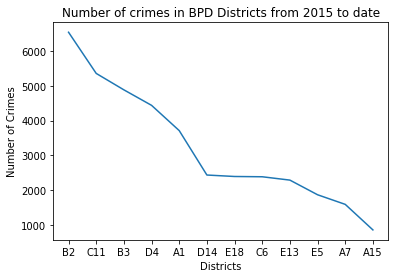

In [26]:
plt.plot(df_crime['DISTRICT'].value_counts())
plt.title('Number of crimes in BPD Districts from 2015 to date')
plt.xlabel('Districts')
plt.ylabel('Number of Crimes')

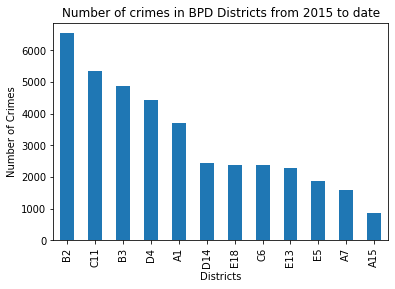

In [27]:
df_crime['DISTRICT'].value_counts().plot(kind='bar')
plt.title('Number of crimes in BPD Districts from 2015 to date')
plt.xlabel('Districts')
plt.ylabel('Number of Crimes')
plt.show()

The three most critical districts are: B-2, C-11 and B-3. The lowest numbers of crimes are in these districts: A-15, A-7 and E-5. Let's see which neighborhoods make up the aforementioned districts.

In [28]:
df.loc[(df['BPD Districts'] == 'B-2') | (df['BPD Districts'] == 'C-11') | (df['BPD Districts'] == 'B-3')].sort_values(by=['BPD Districts'], ascending=True)

,Boston Neighborhoods,Latitude,Longitude,Zip Code,BPD Districts
15,Mission Hill,42.335780,-71.109810,"02120, 02115",B-2
18,Roxbury,42.330297,-71.089481,02119,B-2
13,Mattapan,42.278225,-71.096083,02126,B-3
7,Dorchester,42.351349,-71.052850,02121,C-11
14,Mid-Dorchester,42.351349,-71.052850,"02121, 02122, 02124, 02125",C-11


The most crime-plagued neighborhoods are: Mission Hill, Roxbury, Dorchester, Mid-Dorchester and Mattapan, where **Mission Hill and Roxbury are the worst**.  

In [29]:
df.loc[(df['BPD Districts'] == 'A-15') | (df['BPD Districts'] == 'A-7') | (df['BPD Districts'] == 'E-5')].sort_values(by=['BPD Districts'], ascending=True)

,Boston Neighborhoods,Latitude,Longitude,Zip Code,BPD Districts
5,Charlestown,42.367770,-71.059017,02129,A-15
9,East Boston,42.351414,-71.056713,02128,A-7
17,Roslindale,42.281813,-71.137111,02131,E-5
22,West Roxbury,42.282193,-71.145995,02132,E-5


Neighborhoods with the lowest crime rate are: Charlestown, East Boston, Roslindale and West Roxbury, where **Charlestown is the best**.

Homocide is one of the worst types of crime acts. So, let's see how things stand with this type of crime.

In [30]:
df_crime['DISTRICT'][df_crime['OFFENSE_DESCRIPTION'] == 'MURDER, NON-NEGLIGIENT MANSLAUGHTER'].value_counts()

B2     72
B3     65
C11    46
E13    20
E18    10
D4      8
C6      7
A1      7
A7      7
D14     3
E5      1
Name: DISTRICT, dtype: int64

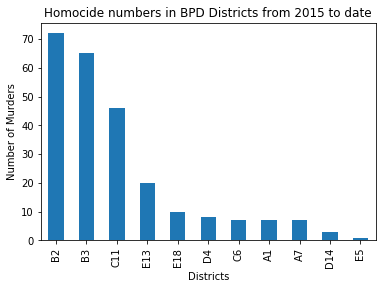

In [31]:
df_crime['DISTRICT'][df_crime['OFFENSE_DESCRIPTION'] == 'MURDER, NON-NEGLIGIENT MANSLAUGHTER'].value_counts().plot(kind='bar')
plt.title('Homocide numbers in BPD Districts from 2015 to date')
plt.xlabel('Districts')
plt.ylabel('Number of Murders')
plt.show()

Again, B-2, B-3 and C-11, i.e. **Mission Hill, Roxbury, Dorchester, Mid-Dorchester and Mattapan are the worst**. A-15, i.e. **Charlestown is not even on the chart**, which means that **there haven't been any registered murders in this neighborhood for almost 5 years**. E-5, i.e. Roslindale and West Roxbury are on listed, but with the lowest number of only 1 murder in five years. A-7, i.e. East Boston has only 7 murders, which again is far fro terrible, compared to the 3 worst neighborhoods.  

#### b) Two lists of the best and the worst Boston neighborhoods

These are not our lists and someone might find them biased or misguiding. But we are of the opinion that they are worth considering. As we noted before, the methodology is explained in articles that accompany the lists, so those who are interested may take a look at the explanation and rationale behind the lists. We won't do that here. Instead, we'll use them as they are, in their given form. 

So let's scrape the data from the lists. 

In [32]:
res1 = requests.get(
    'https://www.homesnacks.net/best-neighborhoods-in-boston-ma-128139/#methodology')

soup1 = BeautifulSoup(res1.text, 'html.parser')
table1 = soup1.find('table')

df_best_neighborhoods = pd.read_html(str(table1))
df_best_neighborhoods = df_best_neighborhoods[0]
df_best_neighborhoods

,Rank,Neighborhood,Population,Home Value,Median Income
0,1,Back Bay-Beacon Hill,28988,"$776,224","$93,684"
1,2,Charlestown,17208,"$426,124","$91,998"
2,3,West Roxbury,32855,"$407,058","$91,763"
3,4,Central,33579,"$595,762","$93,484"
4,5,South End,34304,"$558,804","$72,022"
5,6,Allston-Brighton,67713,"$306,048","$61,281"
6,7,South Boston,38206,"$367,531","$86,753"
7,8,Jamaica Plain,45158,"$359,364","$75,652"
8,9,Roslindale,36129,"$293,614","$80,867"
9,10,South Dorchester,66765,"$352,652","$61,578"


This is the list of the best neighborhoods: **Back Bay, Beacon Hill and West Roxbury** are proclaimed to be **the best**.

Let's scrape the data and look at the second list now.

In [33]:
res2 = requests.get(
    'https://www.roadsnacks.net/worst-boston-neighborhoods/')

soup2 = BeautifulSoup(res2.text, 'html.parser')
table2 = soup2.find('table')

df_worst_neighborhoods = pd.read_html(str(table2))
df_worst_neighborhoods = df_worst_neighborhoods[0]
df_worst_neighborhoods

,Rank,Neighborhood,Population,Home Value,Median Income
0,1,Roxbury,63672,"$273,402","$34,616"
1,2,Mattapan,39010,"$237,849","$45,798"
2,3,North Dorchester,27791,"$343,331","$56,252"
3,4,East Boston,43436,"$276,989","$56,961"
4,5,Hyde Park,35116,"$324,484","$65,408"
5,6,Fenway-Kenmore,38280,"$241,970","$48,949"
6,7,South Dorchester,66765,"$352,652","$61,578"
7,8,Roslindale,36129,"$293,614","$80,867"
8,9,Jamaica Plain,45158,"$359,364","$75,652"
9,10,South Boston,38206,"$367,531","$86,753"


As obvious, it's actually the same list, but turned on its head. So, according to this list, the **worst 3 neighborhoods** are: **Roxbury, Mattapan and North Dorchester**.

#### c) Number and types of venues in Boston neighborhoods

For this part we'll need the Foursquare API and our Foursquare credentials.

In [34]:
CLIENT_ID = 'DLEPKVUPBD22IWQUTN2PAYMXRPPSSNG322V3KVLF35CLNV0F'
CLIENT_SECRET = 'MFVKOQGWMBP3IU35Y04EJECLOGISGUEQPFSKQZ2VE2JMBUSE'
VERSION = '20180605'

print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

CLIENT_ID: DLEPKVUPBD22IWQUTN2PAYMXRPPSSNG322V3KVLF35CLNV0F
CLIENT_SECRET:MFVKOQGWMBP3IU35Y04EJECLOGISGUEQPFSKQZ2VE2JMBUSE


Let's get the data we need about the venues in the 23 neighborhoods and turn it into a pandas dataframe.

We'll search for the venues in radius of 500m (from the neighborhoods' centers) and limit the results to maximum 100 units. Of course, this does not encompass every single venue in each neighborhood, but this way we'll still get an adequate picture about the frequency and type of venues in Boston neighborhoods.   

In [35]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):

    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)

        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            lng,
            radius,
            LIMIT)

        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            lat,
            lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame(
        [item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Neighborhood Latitude',
                             'Neighborhood Longitude',
                             'Venue',
                             'Venue Latitude',
                             'Venue Longitude',
                             'Venue Category']

    return(nearby_venues)

In [36]:
boston_venues = getNearbyVenues(names=df['Boston Neighborhoods'],
                                  latitudes=df['Latitude'],
                                  longitudes=df['Longitude']
                                  )
boston_venues

Allston
Back Bay
Bay Village
Beacon Hill
Brighton
Charlestown
Chinatown-Leather District
Dorchester
Downtown
East Boston
Fenway-Kenmore
Hyde Park
Jamaica Plain
Mattapan
Mid-Dorchester
Mission Hill
North End
Roslindale
Roxbury
South Boston
South End
West End
West Roxbury


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Allston,42.350466,-71.111004,Boston House of Pizza,42.350281,-71.113864,Pizza Place
1,Allston,42.350466,-71.111004,OTTO,42.350388,-71.115236,Pizza Place
2,Allston,42.350466,-71.111004,Amazon@Boston,42.350761,-71.114298,Shipping Store
3,Allston,42.350466,-71.111004,Pavement Coffeehouse,42.350030,-71.107020,Café
4,Allston,42.350466,-71.111004,Nud Pob Thai Cuisine,42.349996,-71.107152,Thai Restaurant
...,...,...,...,...,...,...,...
1369,West Roxbury,42.282193,-71.145995,WO Plumbing Heating and Cooling,42.279658,-71.149414,Home Service
1370,West Roxbury,42.282193,-71.145995,MJ Sub & Pizza,42.285940,-71.145071,Pizza Place
1371,West Roxbury,42.282193,-71.145995,Stash's Pizza,42.286044,-71.145208,Pizza Place
1372,West Roxbury,42.282193,-71.145995,Boston Paws,42.286120,-71.145160,Pet Store


OK, this is good. But let's see how many venues are in each neighborhood.

In [37]:
boston_venues['Neighborhood'].value_counts()

Dorchester                    100
Back Bay                      100
Mid-Dorchester                100
Downtown                      100
East Boston                   100
Chinatown-Leather District    100
South Boston                  100
West End                       91
North End                      88
South End                      78
Bay Village                    75
Fenway-Kenmore                 65
Charlestown                    57
Beacon Hill                    49
Mission Hill                   44
Brighton                       31
Allston                        30
Jamaica Plain                  20
Hyde Park                      15
Roxbury                        13
West Roxbury                    7
Roslindale                      7
Mattapan                        4
Name: Neighborhood, dtype: int64

Let's plot this data. 

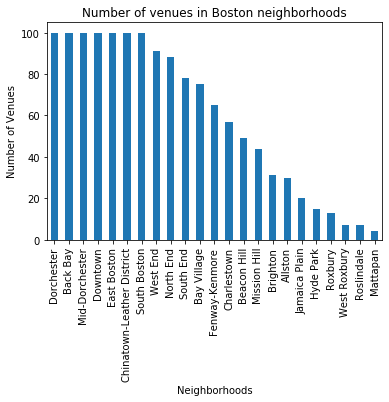

In [38]:
boston_venues['Neighborhood'].value_counts().plot(kind='bar')
plt.title('Number of venues in Boston neighborhoods')
plt.xlabel('Neighborhoods')
plt.ylabel('Number of Venues')
plt.show()

It looks like Mattapan, West Roxbury and Roslindale have the lowest numbers of venues. 

OK, now let's check how many unique categories of venues are there. 

In [39]:
len(boston_venues['Venue Category'].unique())

211

Let's now analyze more closely the neighborhoods with regard to the types of venues found in each of them. 

In [40]:
boston_onehot = pd.get_dummies(
    boston_venues[['Venue Category']], prefix="", prefix_sep="")
boston_onehot['Neighborhood'] = boston_venues['Neighborhood']

fixed_columns = [boston_onehot.columns[-1]] + \
    list(boston_onehot.columns[:-1])
boston_onehot = boston_onehot[fixed_columns]

boston_onehot.head(11)

,Zoo Exhibit,Accessories Store,African Restaurant,American Restaurant,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Trail,Train Station,Used Bookstore,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Next, let's group rows by neighborhood and calculate the mean of the frequency of occurrence of each category:

In [41]:
boston_grouped = boston_onehot.groupby('Neighborhood').mean().reset_index()
boston_grouped

,Neighborhood,Zoo Exhibit,Accessories Store,African Restaurant,American Restaurant,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Trail,Train Station,Used Bookstore,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Allston,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.00,0.000000,0.00,0.033333,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
1,Back Bay,0.000000,0.020000,0.000000,0.020000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.01,0.000000,0.00,0.000000,0.000000,0.020000,0.010000,0.010000,0.02,0.020000
2,Bay Village,0.000000,0.000000,0.000000,0.066667,0.000000,0.013333,0.00,0.013333,0.013333,...,0.00,0.000000,0.00,0.013333,0.000000,0.000000,0.013333,0.013333,0.00,0.013333
3,Beacon Hill,0.000000,0.000000,0.000000,0.061224,0.000000,0.000000,0.00,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
4,Brighton,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.032258,...,0.00,0.000000,0.00,0.000000,0.000000,0.032258,0.000000,0.000000,0.00,0.064516
5,Charlestown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
6,Chinatown-Leather District,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.00,0.000000,0.060000,...,0.00,0.000000,0.00,0.020000,0.000000,0.010000,0.020000,0.000000,0.00,0.010000
7,Dorchester,0.000000,0.000000,0.000000,0.030000,0.000000,0.010000,0.01,0.000000,0.020000,...,0.00,0.000000,0.00,0.010000,0.010000,0.000000,0.020000,0.000000,0.00,0.000000
8,Downtown,0.000000,0.000000,0.000000,0.030000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.00,0.000000,0.01,0.000000,0.000000,0.000000,0.000000,0.010000,0.00,0.000000
9,East Boston,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.01,0.000000,0.040000,...,0.00,0.000000,0.00,0.020000,0.000000,0.010000,0.020000,0.000000,0.00,0.010000


The top 5 common venues in each neighborhood are:

In [42]:
num_top_venues = 5
for hood in boston_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = boston_grouped[boston_grouped['Neighborhood']
                            == hood].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(
        drop=True).head(num_top_venues))
    print('\n')

----Allston----
                venue  freq
0                Café  0.07
1         Coffee Shop  0.07
2  Chinese Restaurant  0.07
3         Pizza Place  0.07
4            Pharmacy  0.07


----Back Bay----
                venue  freq
0      Clothing Store  0.08
1         Coffee Shop  0.05
2  Italian Restaurant  0.04
3               Hotel  0.03
4           Bookstore  0.03


----Bay Village----
                   venue  freq
0                Theater  0.09
1                  Hotel  0.07
2    American Restaurant  0.07
3  Performing Arts Venue  0.05
4     Seafood Restaurant  0.05


----Beacon Hill----
                 venue  freq
0  American Restaurant  0.06
1   Italian Restaurant  0.06
2            Hotel Bar  0.06
3          Pizza Place  0.06
4    French Restaurant  0.04


----Brighton----
                 venue  freq
0          Pizza Place  0.10
1          Coffee Shop  0.06
2          Yoga Studio  0.06
3      Bubble Tea Shop  0.03
4  Japanese Restaurant  0.03


----Charlestown----
          

That's cool. But now let's try something else: creating a pandas dataframe with the top 10 common venues in each neighborhood.

In [43]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top_venues]

In [44]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']


columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

In [45]:
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = boston_grouped['Neighborhood']

for ind in np.arange(boston_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(
        boston_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allston,Mexican Restaurant,Pharmacy,Café,Pizza Place,Chinese Restaurant,Coffee Shop,College Quad,Thai Restaurant,Convenience Store,Donut Shop
1,Back Bay,Clothing Store,Coffee Shop,Italian Restaurant,Bookstore,Grocery Store,Hotel,Ice Cream Shop,Bar,Yoga Studio,Sandwich Place
2,Bay Village,Theater,American Restaurant,Hotel,Seafood Restaurant,Performing Arts Venue,Sandwich Place,Spa,Steakhouse,Dive Bar,Italian Restaurant
3,Beacon Hill,Hotel Bar,American Restaurant,Italian Restaurant,Pizza Place,Gourmet Shop,Gift Shop,French Restaurant,Playground,Restaurant,Grocery Store
4,Brighton,Pizza Place,Yoga Studio,Coffee Shop,Nightclub,Rock Club,Chinese Restaurant,Rental Car Location,Record Shop,Pub,Music Venue
5,Charlestown,Pizza Place,Park,Italian Restaurant,Bar,Sports Bar,Donut Shop,Hotel,Gastropub,Brewery,Bakery
6,Chinatown-Leather District,Chinese Restaurant,Bakery,Asian Restaurant,Coffee Shop,Sushi Restaurant,Sandwich Place,Theater,Pizza Place,Italian Restaurant,Spa
7,Dorchester,Coffee Shop,Italian Restaurant,Sandwich Place,Bakery,American Restaurant,Hotel,Platform,French Restaurant,Café,Pizza Place
8,Downtown,Coffee Shop,Seafood Restaurant,Historic Site,Sandwich Place,Park,Bakery,American Restaurant,Hotel,New American Restaurant,Italian Restaurant
9,East Boston,Bakery,Chinese Restaurant,Sandwich Place,Coffee Shop,Asian Restaurant,American Restaurant,Sushi Restaurant,Tea Room,Hotpot Restaurant,Dive Bar


Finally, let's categorize and cluster Boston neighborhoods, using the venues data, in 6 different clusters. 

In [46]:
kclusters = 6
boston_grouped_clustering = boston_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, init='k-means++', random_state=0).fit(
    boston_grouped_clustering)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 1, 4, 0, 0, 0,
       5])

Let's create a pandas dataframe with the cluster labels in it:

In [47]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
boston_merged = df

boston_merged = boston_merged.join(
    neighborhoods_venues_sorted.set_index('Neighborhood'), on='Boston Neighborhoods')

boston_merged.head(11)

,Boston Neighborhoods,Latitude,Longitude,Zip Code,BPD Districts,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allston,42.350466,-71.111004,02134,D-14,0,Mexican Restaurant,Pharmacy,Café,Pizza Place,Chinese Restaurant,Coffee Shop,College Quad,Thai Restaurant,Convenience Store,Donut Shop
1,Back Bay,42.349990,-71.087650,02116,D-4,0,Clothing Store,Coffee Shop,Italian Restaurant,Bookstore,Grocery Store,Hotel,Ice Cream Shop,Bar,Yoga Studio,Sandwich Place
2,Bay Village,42.348168,-71.068471,02116,A-1,0,Theater,American Restaurant,Hotel,Seafood Restaurant,Performing Arts Venue,Sandwich Place,Spa,Steakhouse,Dive Bar,Italian Restaurant
3,Beacon Hill,42.358420,-71.068600,02108,A-1,0,Hotel Bar,American Restaurant,Italian Restaurant,Pizza Place,Gourmet Shop,Gift Shop,French Restaurant,Playground,Restaurant,Grocery Store
4,Brighton,42.352131,-71.124924,02135,D-14,0,Pizza Place,Yoga Studio,Coffee Shop,Nightclub,Rock Club,Chinese Restaurant,Rental Car Location,Record Shop,Pub,Music Venue
5,Charlestown,42.367770,-71.059017,02129,A-15,0,Pizza Place,Park,Italian Restaurant,Bar,Sports Bar,Donut Shop,Hotel,Gastropub,Brewery,Bakery
6,Chinatown-Leather District,42.352510,-71.060900,02111,A-1,0,Chinese Restaurant,Bakery,Asian Restaurant,Coffee Shop,Sushi Restaurant,Sandwich Place,Theater,Pizza Place,Italian Restaurant,Spa
7,Dorchester,42.351349,-71.052850,02121,C-11,0,Coffee Shop,Italian Restaurant,Sandwich Place,Bakery,American Restaurant,Hotel,Platform,French Restaurant,Café,Pizza Place
8,Downtown,42.358290,-71.056630,02201,A-1,0,Coffee Shop,Seafood Restaurant,Historic Site,Sandwich Place,Park,Bakery,American Restaurant,Hotel,New American Restaurant,Italian Restaurant
9,East Boston,42.351414,-71.056713,02128,A-7,0,Bakery,Chinese Restaurant,Sandwich Place,Coffee Shop,Asian Restaurant,American Restaurant,Sushi Restaurant,Tea Room,Hotpot Restaurant,Dive Bar


Let's vizualize the results.

In [48]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


markers_colors = []
for lat, lon, poi, cluster in zip(boston_merged['Latitude'], boston_merged['Longitude'], boston_merged['Boston Neighborhoods'], boston_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' +
                         str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color='black',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

We can see 4 different colors which correpond to the 6 different clusters we got.

We're almost there. The last step is to show the values for each of these 6 clusters:

In [49]:
boston_merged.loc[boston_merged['Cluster Labels'] == 0,
                     boston_merged.columns[[0] + list(range(4, boston_merged.shape[1]))]]

,Boston Neighborhoods,BPD Districts,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allston,D-14,0,Mexican Restaurant,Pharmacy,Café,Pizza Place,Chinese Restaurant,Coffee Shop,College Quad,Thai Restaurant,Convenience Store,Donut Shop
1,Back Bay,D-4,0,Clothing Store,Coffee Shop,Italian Restaurant,Bookstore,Grocery Store,Hotel,Ice Cream Shop,Bar,Yoga Studio,Sandwich Place
2,Bay Village,A-1,0,Theater,American Restaurant,Hotel,Seafood Restaurant,Performing Arts Venue,Sandwich Place,Spa,Steakhouse,Dive Bar,Italian Restaurant
3,Beacon Hill,A-1,0,Hotel Bar,American Restaurant,Italian Restaurant,Pizza Place,Gourmet Shop,Gift Shop,French Restaurant,Playground,Restaurant,Grocery Store
4,Brighton,D-14,0,Pizza Place,Yoga Studio,Coffee Shop,Nightclub,Rock Club,Chinese Restaurant,Rental Car Location,Record Shop,Pub,Music Venue
5,Charlestown,A-15,0,Pizza Place,Park,Italian Restaurant,Bar,Sports Bar,Donut Shop,Hotel,Gastropub,Brewery,Bakery
6,Chinatown-Leather District,A-1,0,Chinese Restaurant,Bakery,Asian Restaurant,Coffee Shop,Sushi Restaurant,Sandwich Place,Theater,Pizza Place,Italian Restaurant,Spa
7,Dorchester,C-11,0,Coffee Shop,Italian Restaurant,Sandwich Place,Bakery,American Restaurant,Hotel,Platform,French Restaurant,Café,Pizza Place
8,Downtown,A-1,0,Coffee Shop,Seafood Restaurant,Historic Site,Sandwich Place,Park,Bakery,American Restaurant,Hotel,New American Restaurant,Italian Restaurant
9,East Boston,A-7,0,Bakery,Chinese Restaurant,Sandwich Place,Coffee Shop,Asian Restaurant,American Restaurant,Sushi Restaurant,Tea Room,Hotpot Restaurant,Dive Bar


In [50]:
boston_merged.loc[boston_merged['Cluster Labels'] == 1,
                     boston_merged.columns[[0] + list(range(4, boston_merged.shape[1]))]]

,Boston Neighborhoods,BPD Districts,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Roslindale,E-5,1,Bar,Home Service,African Restaurant,Chinese Restaurant,Pet Store,Latin American Restaurant,Italian Restaurant,Electronics Store,Doctor's Office,Dog Run


In [51]:
boston_merged.loc[boston_merged['Cluster Labels'] == 2,
                     boston_merged.columns[[0] + list(range(4, boston_merged.shape[1]))]]

,Boston Neighborhoods,BPD Districts,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Mattapan,B-3,2,Construction & Landscaping,Ice Cream Shop,Pizza Place,Event Service,Yoga Studio,Dive Bar,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space


In [52]:
boston_merged.loc[boston_merged['Cluster Labels'] == 3,
                     boston_merged.columns[[0] + list(range(4, boston_merged.shape[1]))]]

,Boston Neighborhoods,BPD Districts,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,North End,A-1,3,Italian Restaurant,Pizza Place,Park,Seafood Restaurant,Bakery,Café,Coffee Shop,Harbor / Marina,Grocery Store,Sandwich Place


In [53]:
boston_merged.loc[boston_merged['Cluster Labels'] == 4,
                     boston_merged.columns[[0] + list(range(4, boston_merged.shape[1]))]]

,Boston Neighborhoods,BPD Districts,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Roxbury,B-2,4,Donut Shop,Pharmacy,Track,Burger Joint,Café,Diner,Theater,Rental Car Location,Soccer Field,Pizza Place


In [54]:
boston_merged.loc[boston_merged['Cluster Labels'] == 5,
                     boston_merged.columns[[0] + list(range(4, boston_merged.shape[1]))]]

,Boston Neighborhoods,BPD Districts,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,West Roxbury,E-5,5,Home Service,Pizza Place,Pet Store,Train Station,Yoga Studio,Discount Store,Falafel Restaurant,Event Space,Event Service,Ethiopian Restaurant
